In [129]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

a) The PLA will never be able to converge.

In [130]:
import random
import matplotlib.pyplot as plt

# the pocket algorithm
# returns w0, w1, w2, the weights
# X1,Y1 in top semisircle, f(X1,Y1) = -1
# X2,Y2 in bottom semicircle, f(X2,Y2) = 1

def error(X1,Y1,X2,Y2,w0,w1,w2):
    misclasified = 0  
    for i in range(len(X1)): #top semicircle
        z = -1.0  
        s = w0 + w1*X1[i] + w2*Y1[i]
        if  s*z <= 0:          
            misclasified += 1 
            
    for i in range(len(X2)): #bottom semicircle
        z = 1.0  
        s = w0 + w1*X2[i] + w2*Y2[i]
        if  s*z <= 0:
            misclasified += 1
    return misclasified

def Pocket(X1,Y1,X2,Y2,max_iter,w0 = 0.0,w1 = 0.0,w2 = 0.0):
    
    # flag to indicate that no missclassified points left
    done = False
    # inetrations counter
    k = 0
    Ein = []
    iteration = []
    while done == False and k < max_iter:       
        for i in np.random.permutation(len(top)+len(bottom)):
            e = error(X1,Y1,X2,Y2,w0,w1,w2)
            Ein.append(e)
            iteration.append(k)
            done = True
            if i < len(top): #top
                z = -1.0  
                s = w0 + w1*X1[i] + w2*Y1[i]
                if  s*z <= 0:                        
                    w0_try = w0 + z
                    w1_try = w1 + z*X1[i]
                    w2_try = w2 + z*Y1[i]                    
                    done = False
                    break      
            else: #bottom
                z = 1.0    
                s = w0 + w1*X2[i-len(top)] + w2*Y2[i-len(top)]
                if  s*z <= 0:                        
                    w0_try = w0 + z
                    w1_try = w1 + z*X2[i-len(top)]
                    w2_try = w2 + z*Y2[i-len(top)]
                    done = False
                    break 
        if e > error(X1,Y1,X2,Y2,w0_try,w1_try,w2_try):
            w0 = w0_try 
            w1 = w1_try 
            w2 = w2_try 
        k= k + 1
      
    return w0, w1, w2, iteration, Ein
       

In [131]:
#Linear Regression
def LinReg(top,bottom):
    
    # Create outputs vector
    z_top = [-1.0]*len(top)
    z_bottom = [1.0]*len(bottom)
    z = np.array(z_top + z_bottom)

    # Create data matrix
    for i in top:
        i.insert(0,1.0)
    for i in bottom:
        i.insert(0,1.0)     
    D = np.matrix(top + bottom)

    D_t = D.transpose()
    X = np.dot(D_t, D)

    # pseudo inverse
    X_p_inv = np.dot(X.I, D_t)

    # calculatae weights
    w = np.dot(X_p_inv, z)
    
    return w


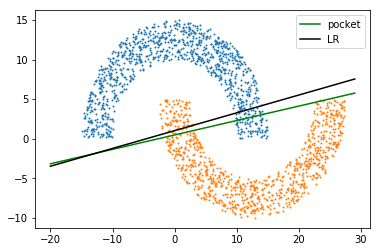

In [132]:
top,bottom = generatedata(rad,thk,sep,2000)
X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]
X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

#plot the data
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

w0_p, w1_p, w2_p, iteration, Ein = Pocket(X1,Y1,X2,Y2,100000,w0= 0.0,w1= 0.0,w2= 0.0)
w = LinReg(top,bottom)

# plot the final hypothesis from PLA
t= np.arange(-20,30)
g_pla= -(w1_p*t)/w2_p - w0_p/w2_p
plt.plot(t, g_pla, linestyle='-', color='green', label= 'pocket')


# plot the final hypothesis from Linear Regression
g_lr= -(w[0,1]*t)/w[0,2] - w[0,0]/w[0,2]
plt.plot(t, g_lr, linestyle='-', color='black', label= 'LR')

plt.legend(loc= 'best')
plt.show()   



The number of misclassified point after running PLA is
170
The number of misclassified point after running Linear Regression is
192


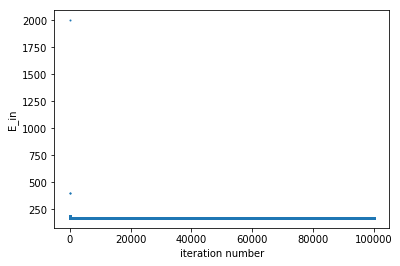

In [138]:
print("The number of misclassified point after running PLA is")
print(Ein[99999])

print("The number of misclassified point after running Linear Regression is")
print(error(X1,Y1,X2,Y2,w[0,0],w[0,1],w[0,2]))
# plot E_in vs. iteration
plt.scatter(iteration,Ein, s = 1 )
plt.xlabel('iteration number')
plt.ylabel('E_in')
plt.show()

The Pocket algorithm takes about 15 minutes to finish all 100,000 iteration, while Linear Regression returns result immediately. PLA results in fewer misclassified points.